In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 1730285881-Airbnb_Open_Data(in).csv to 1730285881-Airbnb_Open_Data(in).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

file_path = './1730285881-Airbnb_Open_Data(in).csv'
df_airbnb = pd.read_csv(file_path, encoding = 'utf-8')

head_df = df_airbnb.head(5)
shape_vals = df_airbnb.shape

dtypes_series = df_airbnb.dtypes
missing_counts = df_airbnb.isna().sum()
missing_pct = df_airbnb.isna().mean().round(4) * 100
unique_counts = df_airbnb.nunique(dropna = True)

print(head_df)
print(shape_vals)
print(dtypes_series)
print(missing_counts)
print(missing_pct)
print(unique_counts)

print('Loaded dataset and displayed head, shape, dtypes, missing, and unique counts.')

/tmp/ipython-input-125587261.py:8: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_airbnb = pd.read_csv(file_path, encoding = 'utf-8')


        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United St

In [ ]:
import pandas as pd
import numpy as np

df = df_airbnb.copy()

df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

for col in ['price', 'service_fee']:
    if col in df.columns:
        df[col] = (df[col].astype(str).str.replace('$', '', regex = False)
                   .str.replace(',', '', regex = False)
                   .str.strip())
        df[col] = pd.to_numeric(df[col], errors = 'coerce')

if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors = 'coerce')

bool_cols = []
for col in ['instant_bookable']:
    if col in df.columns:
        bool_cols.append(col)
for col in bool_cols:
    df[col] = df[col].map({'t': True, 'f': False, True: True, False: False}).astype('boolean')

cat_candidates = ['host_identity_verified', 'neighbourhood_group', 'neighbourhood', 'country', 'country_code', 'cancellation_policy', 'room_type', 'house_rules', 'license', 'host_name']
for col in cat_candidates:
    if col in df.columns:
        df[col] = df[col].astype('category')

num_candidates = ['id','host_id','lat','long','construction_year','minimum_nights','number_of_reviews','reviews_per_month','review_rate_number','calculated_host_listings_count','availability_365']
for col in num_candidates:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors = 'coerce')

missing_report = df.isna().mean().round(4) * 100

dup_count = 0
if 'id' in df.columns:
    dup_count = df.duplicated(subset = ['id']).sum()
    df = df.drop_duplicates(subset = ['id'])
else:
    dup_count = df.duplicated().sum()
    df = df.drop_duplicates()

print(df.head())
print(missing_report.sort_values(ascending = False).head(10))
print(dup_count)
print(df.shape)

df_clean = df.copy()
print('Cleaned data: standardized columns, parsed money/dates, cast types, reported missing, removed duplicates.')

        id                                              name      host_id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host_name neighbourhood_group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service_fee  minimum_nights  \
0  40.64749 -73.97237  United S

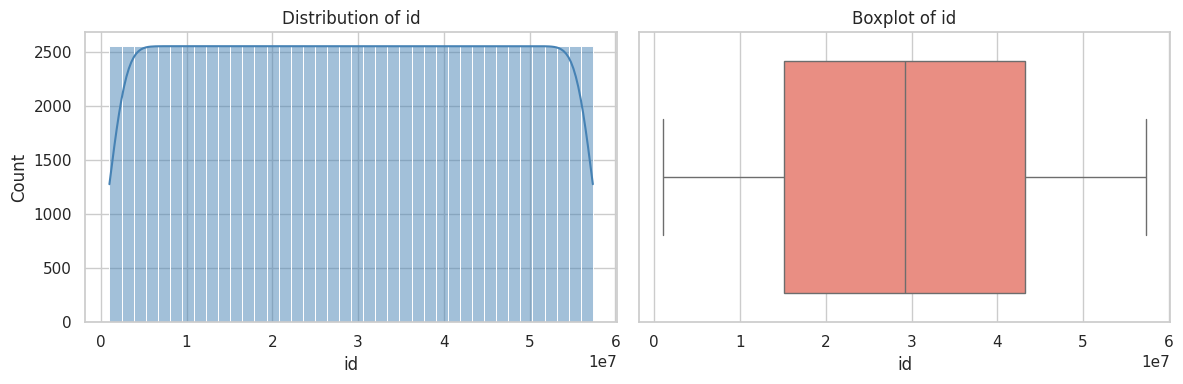

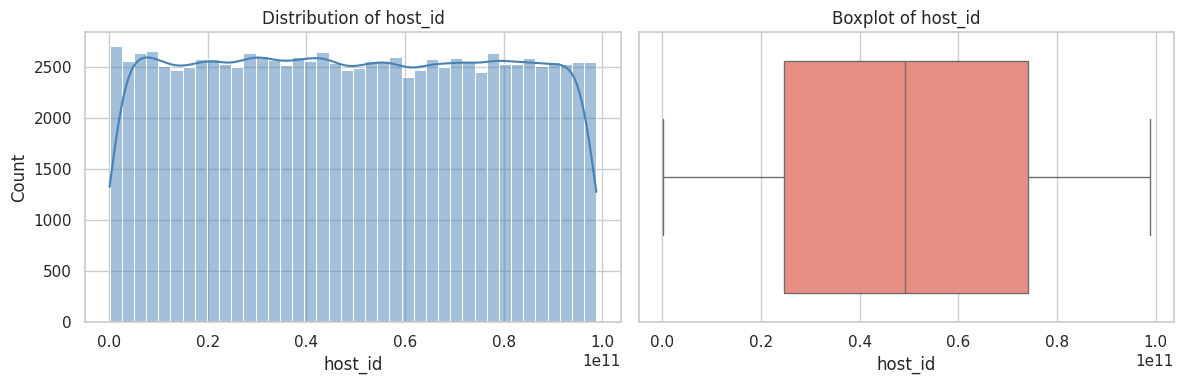

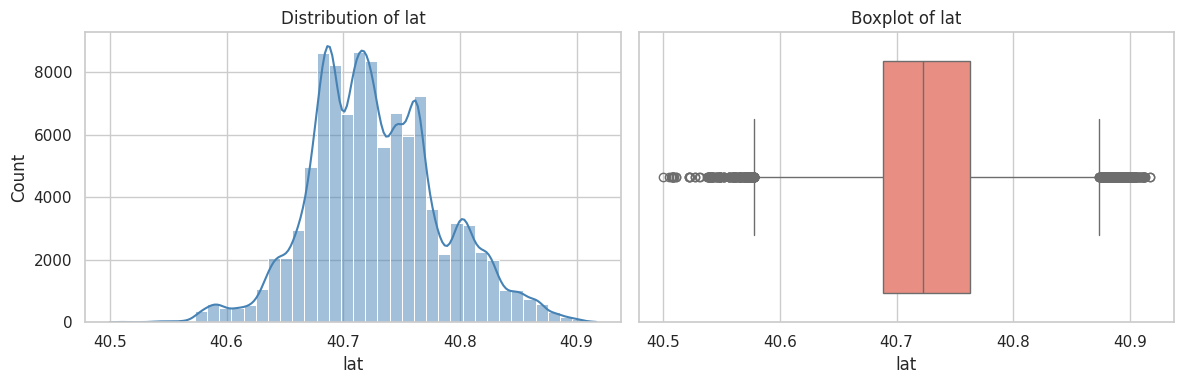

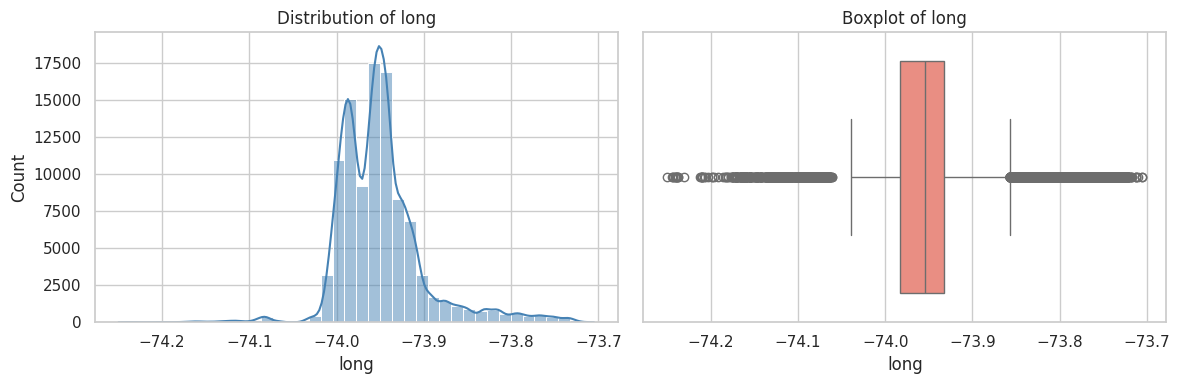

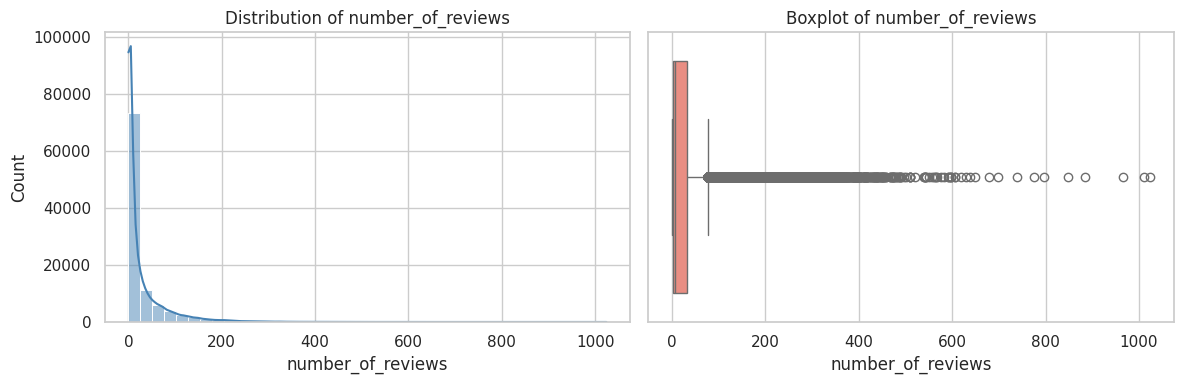

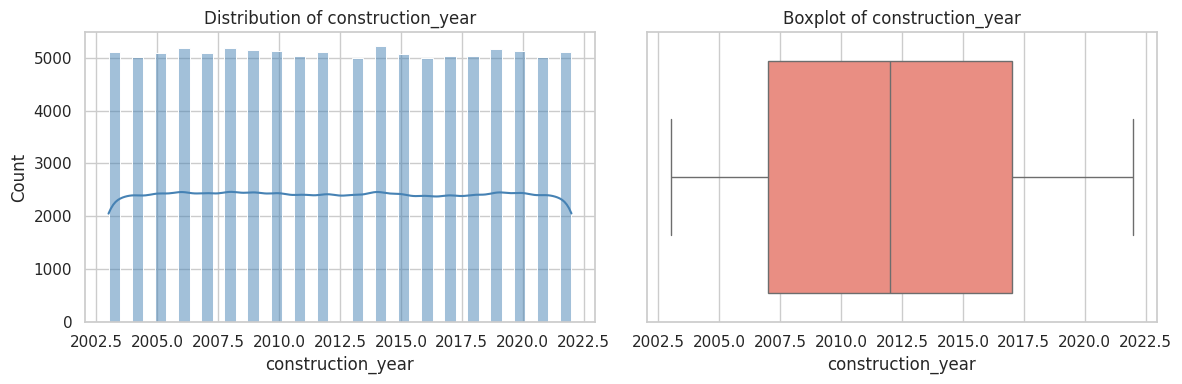

/tmp/ipython-input-1509390091.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.values, y = vc.index, palette = 'viridis')


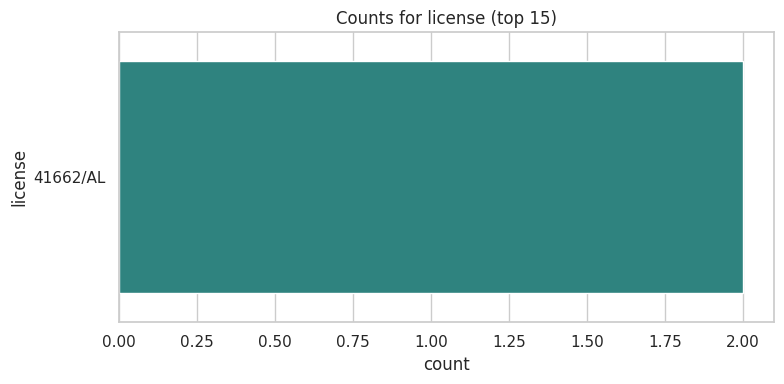

/tmp/ipython-input-1509390091.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.values, y = vc.index, palette = 'viridis')


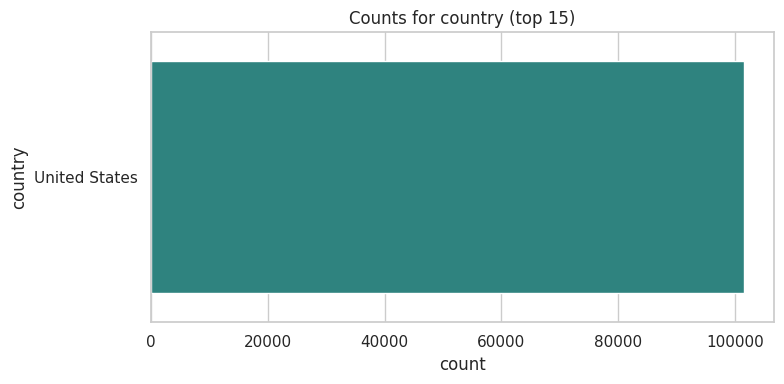

/tmp/ipython-input-1509390091.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.values, y = vc.index, palette = 'viridis')


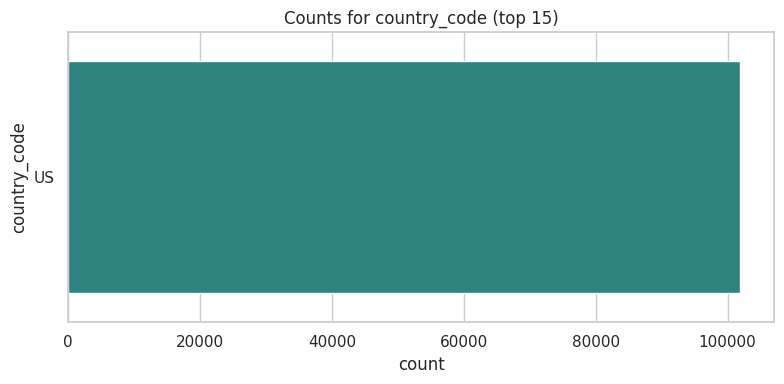

/tmp/ipython-input-1509390091.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.values, y = vc.index, palette = 'viridis')


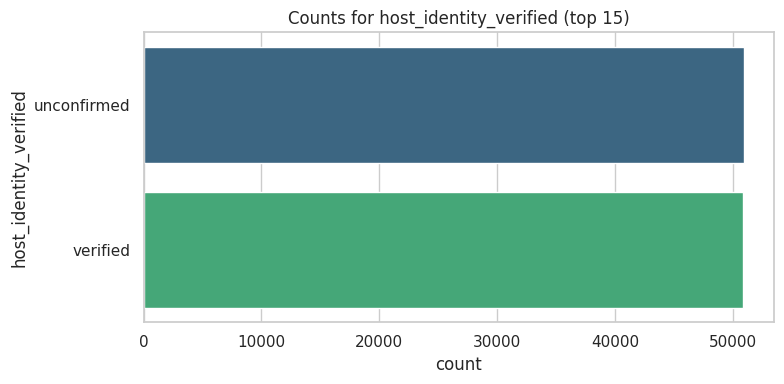

/tmp/ipython-input-1509390091.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.values, y = vc.index, palette = 'viridis')


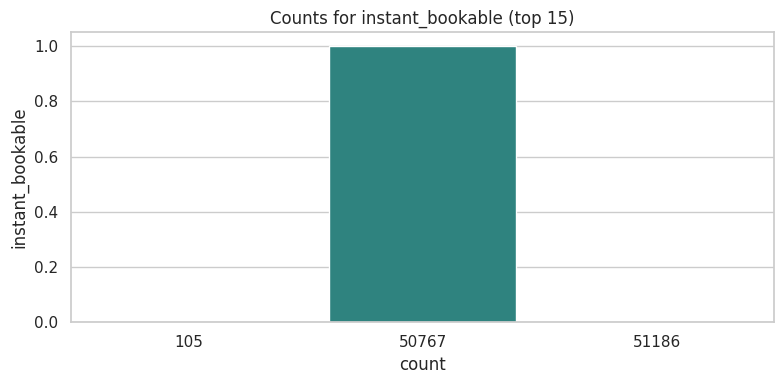

/tmp/ipython-input-1509390091.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.values, y = vc.index, palette = 'viridis')


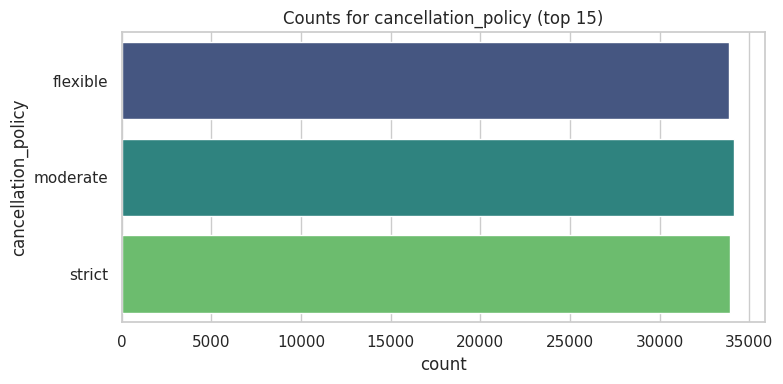

Plotted univariate distributions for numeric and categorical columns.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid')

df = df_clean.copy()

num_cols = df.select_dtypes(include = ['number']).columns.tolist()
cat_cols = df.select_dtypes(include = ['category', 'object', 'boolean']).columns.tolist()

num_order = sorted(num_cols, key = lambda c: df[c].notna().sum(), reverse = True)[:6]
for col in num_order:
    plt.figure(figsize = (12,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), kde = True, bins = 40, color = 'steelblue')
    plt.title('Distribution of ' + col)
    plt.subplot(1,2,2)
    sns.boxplot(x = df[col], color = 'salmon')
    plt.title('Boxplot of ' + col)
    plt.tight_layout()
    plt.show()

cat_order = sorted([c for c in cat_cols if c not in ['house_rules']], key = lambda c: (df[c].nunique(dropna = True), df[c].notna().sum()))[:6]
for col in cat_order:
    plt.figure(figsize = (8,4))
    vc = df[col].value_counts(dropna = False).head(15)
    sns.barplot(x = vc.values, y = vc.index, palette = 'viridis')
    plt.title('Counts for ' + col + ' (top 15)')
    plt.xlabel('count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

print('Plotted univariate distributions for numeric and categorical columns.')

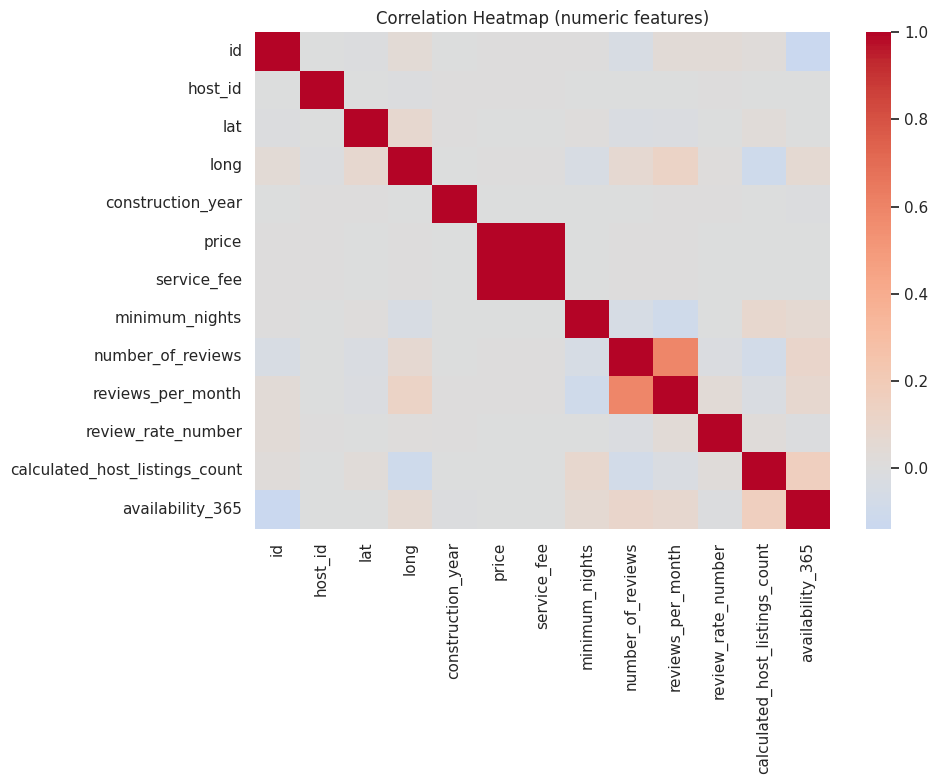

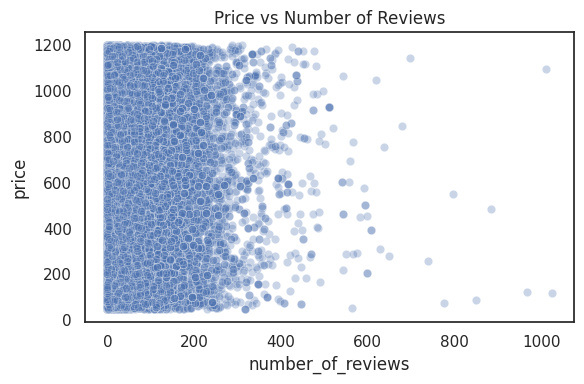

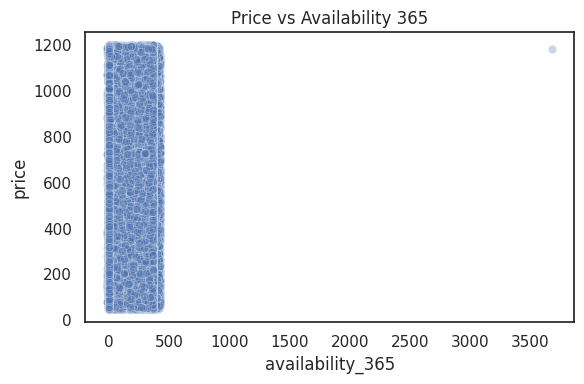

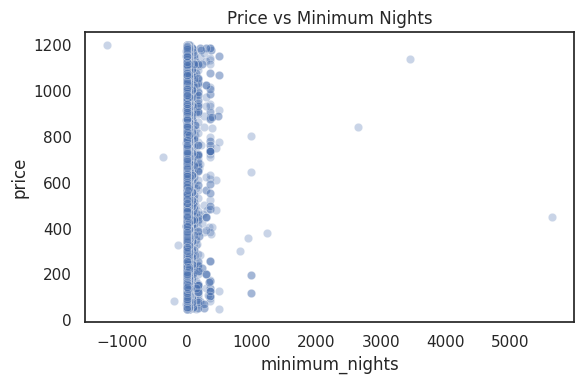

/tmp/ipython-input-1363538824.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_ng = df.groupby('neighbourhood_group', dropna = False)['price'].mean().sort_values(ascending = False).head(15)
/tmp/ipython-input-1363538824.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp_ng.values, y = grp_ng.index, palette = 'mako')


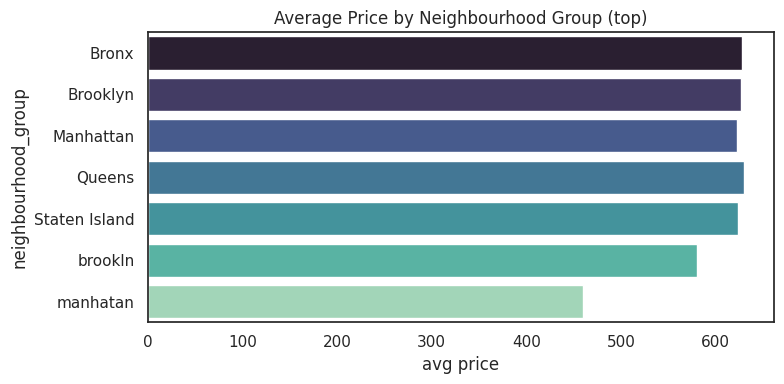

/tmp/ipython-input-1363538824.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_rt = df.groupby('room_type', dropna = False)['price'].mean().sort_values(ascending = False)
/tmp/ipython-input-1363538824.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grp_rt.values, y = grp_rt.index, palette = 'rocket')


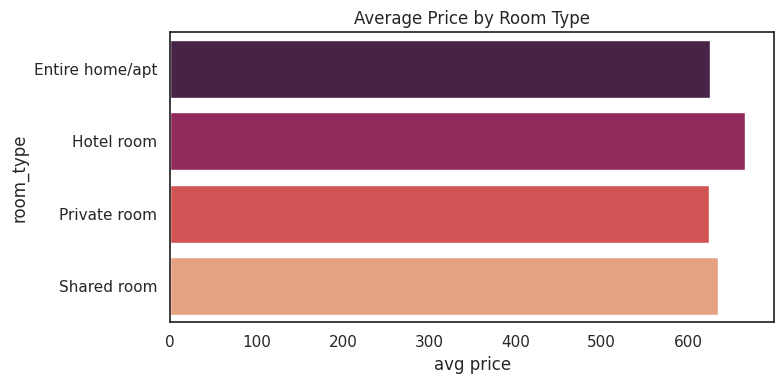

Plotted correlation heatmap, scatterplots, and grouped price analyses.


In [ ]:
# Step 4: Bivariate analysis
# - Correlation heatmap
# - Scatterplots for key relationships
# - Grouped analyses (avg price by neighbourhood_group, room_type)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'white', context = 'notebook')

df = df_clean.copy()

# Correlation heatmap for numeric cols
num_cols = df.select_dtypes(include = ['number']).columns.tolist()
corr = df[num_cols].corr(method = 'pearson')
plt.figure(figsize = (10,8))
sns.heatmap(corr, cmap = 'coolwarm', center = 0, annot = False)
plt.title('Correlation Heatmap (numeric features)')
plt.tight_layout()
plt.show()

# Scatter: price vs reviews, availability, minimum nights
pairs = [('number_of_reviews','Price vs Number of Reviews'),
         ('availability_365','Price vs Availability 365'),
         ('minimum_nights','Price vs Minimum Nights')]
for xcol, title in pairs:
    if 'price' in df.columns and xcol in df.columns:
        plt.figure(figsize = (6,4))
        sns.scatterplot(data = df, x = xcol, y = 'price', alpha = 0.3)
        plt.title(title)
        plt.tight_layout()
        plt.show()

# Grouped means for price by neighbourhood_group and room_type
if 'neighbourhood_group' in df.columns:
    grp_ng = df.groupby('neighbourhood_group', dropna = False)['price'].mean().sort_values(ascending = False).head(15)
    plt.figure(figsize = (8,4))
    sns.barplot(x = grp_ng.values, y = grp_ng.index, palette = 'mako')
    plt.title('Average Price by Neighbourhood Group (top)')
    plt.xlabel('avg price')
    plt.tight_layout()
    plt.show()

if 'room_type' in df.columns:
    grp_rt = df.groupby('room_type', dropna = False)['price'].mean().sort_values(ascending = False)
    plt.figure(figsize = (8,4))
    sns.barplot(x = grp_rt.values, y = grp_rt.index, palette = 'rocket')
    plt.title('Average Price by Room Type')
    plt.xlabel('avg price')
    plt.tight_layout()
    plt.show()

print('Plotted correlation heatmap, scatterplots, and grouped price analyses.')